In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

colors =  [[0, 0.4470, 0.7410],
           [0.8500, 0.3250, 0.0980]
          ]

In [16]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv('results.csv').dropna()
df['time_per_row'] = df['execution_time']/df['rows_affected']
df.head()

,query_number,measurements_count,rows_affected,execution_time,time_per_row
0,0,6480,40,0.195999,0.004900
1,1,6480,22,0.018728,0.000851
2,2,6480,7,0.025593,0.003656
3,3,6480,40,0.029465,0.000737
4,4,6480,360,0.028718,0.000080


In [55]:
query_names = [
    'Read Raw Data for Given Machine',
    'Read Raw Data Conditional on Metrics',
    'Read Metrics',
    'Write Measurement Tags',
    'Delete Raw Data, Metrics, Measurements'
    ]

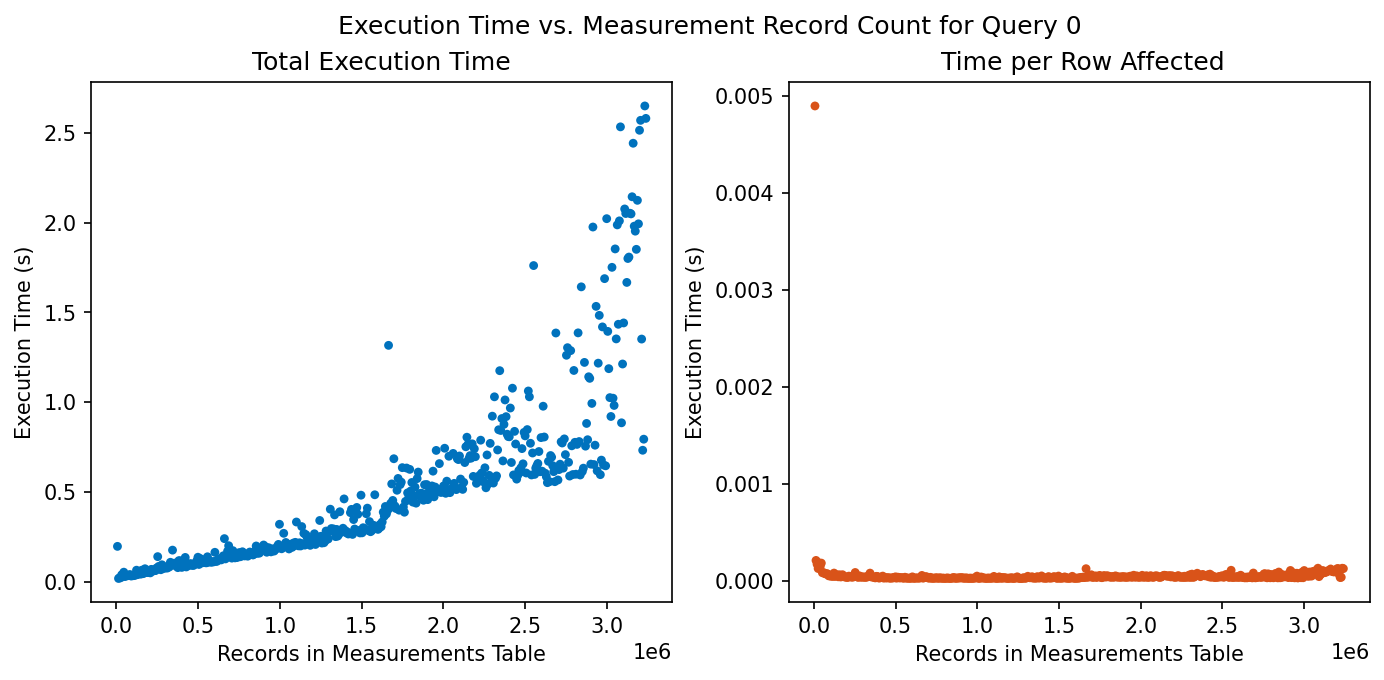

<Figure size 640x480 with 0 Axes>

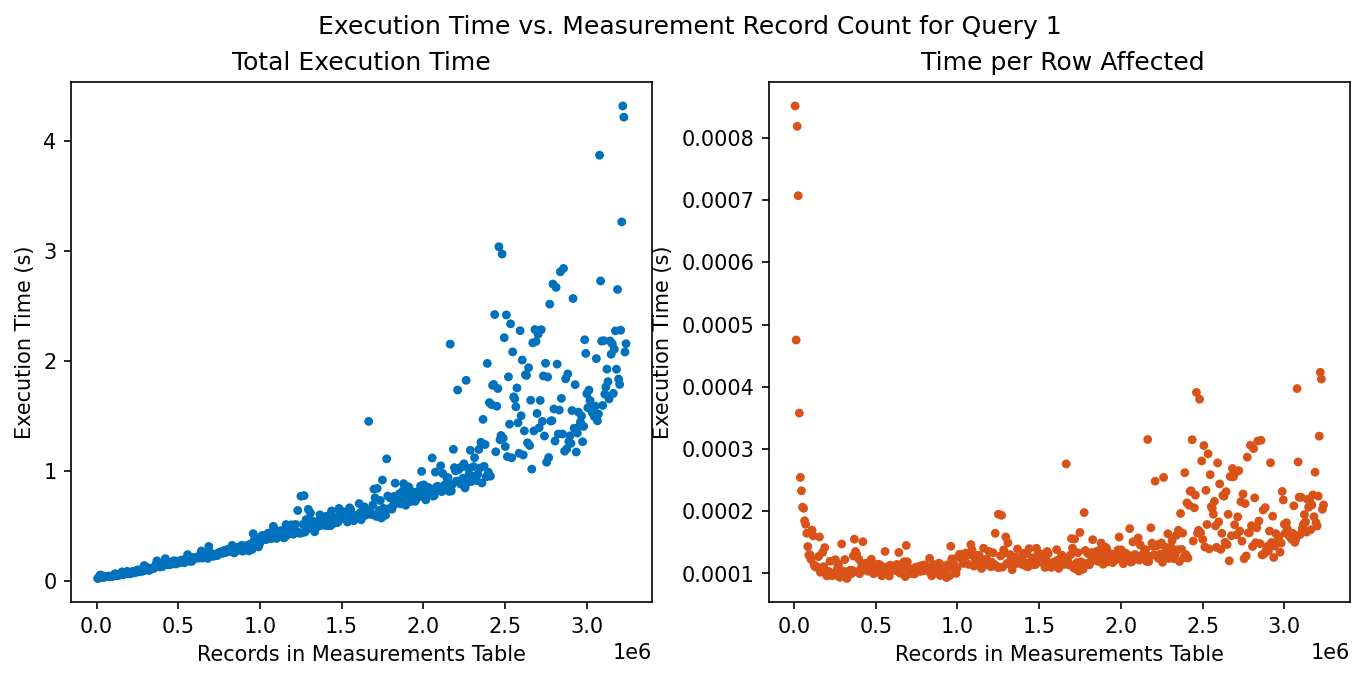

<Figure size 640x480 with 0 Axes>

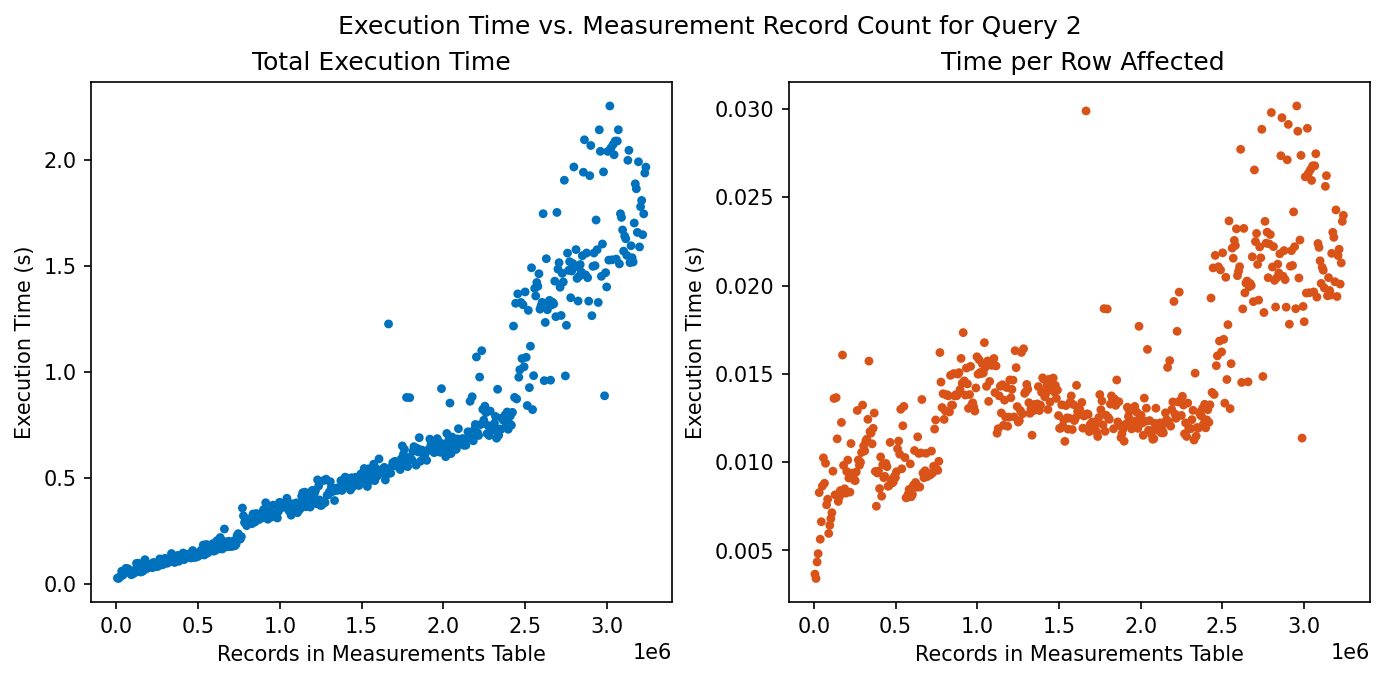

<Figure size 640x480 with 0 Axes>

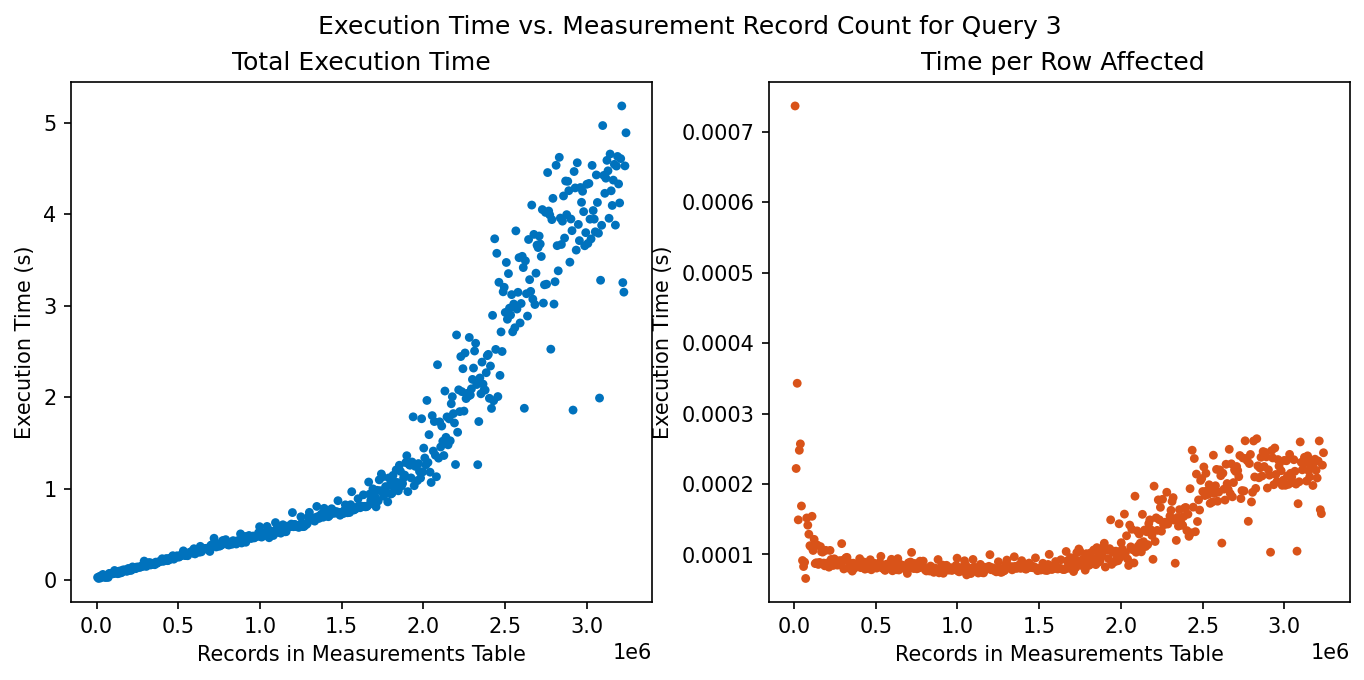

<Figure size 640x480 with 0 Axes>

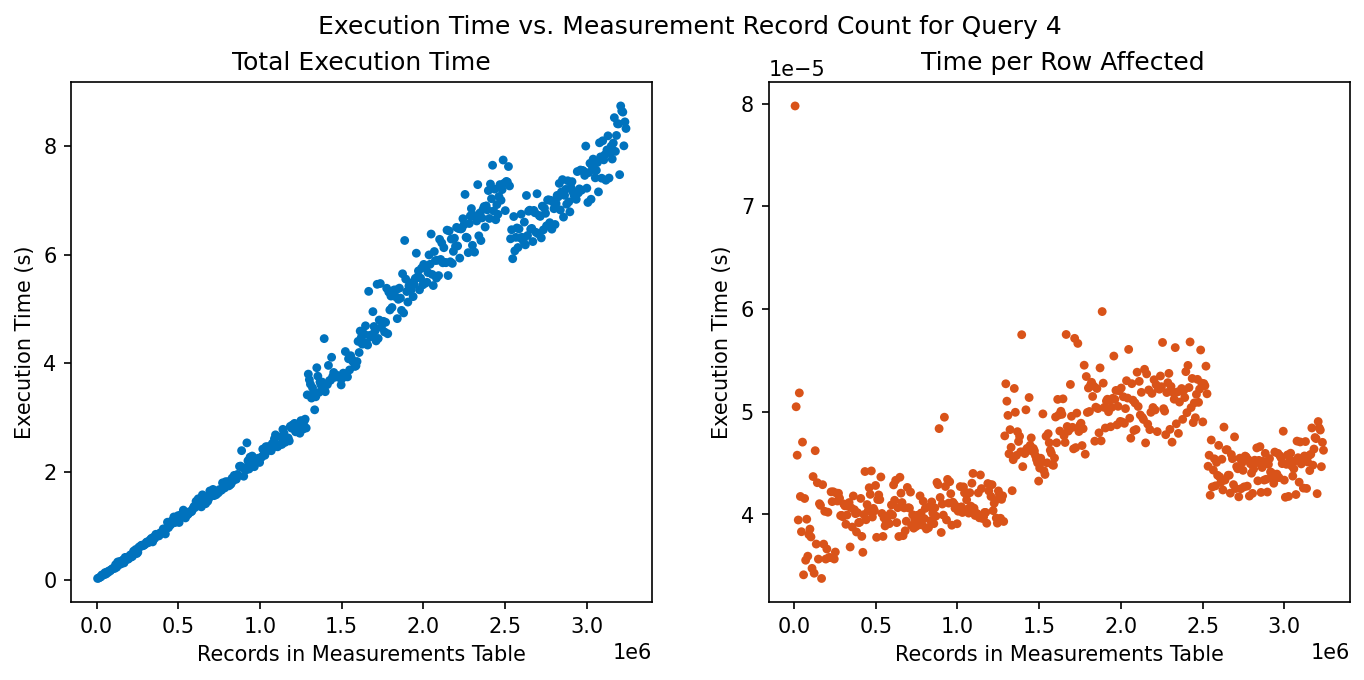

<Figure size 640x480 with 0 Axes>

In [94]:
# Loop through the unique values in column 0 and generate a scatterplot for each value

for val in df['query_number'].unique():
    fig, axes = plt.subplots(1,2, figsize=(11, 4.5), dpi=150)
    # Filter the DataFrame to include only rows with the current value of column 0
    df_q = df[df['query_number'] == val]
    
    #LHS: total time
    # Create a scatterplot with column 1 as the x-axis and column 2 as the y-axis
    sns.scatterplot(ax=axes[0], x='measurements_count', y='execution_time',data=df_q, linewidth=0, size=1, legend=False, color=colors[0])
    
    # Set the title and axis labels
    axes[0].set_title('Total Execution Time')
    axes[0].set_xlabel('Records in Measurements Table')
    axes[0].set_ylabel('Execution Time (s)')
    
    #RHS: time/row
    # Create a scatterplot with column 1 as the x-axis and column 2 as the y-axis
    sns.scatterplot(ax=axes[1], x='measurements_count', y='time_per_row',data=df_q, linewidth=0, size=1, legend=False, color=colors[1])
    
    # Set the title and axis labels
    axes[1].set_title(' Time per Row Affected')
    axes[1].set_xlabel('Records in Measurements Table')
    axes[1].set_ylabel('Execution Time (s)')
    
    # Show the plot
    fig.suptitle('Execution Time vs. Measurement Record Count for Query '+str(val))
    plt.show()
    plt.savefig('query_'+str(val)+'.jpg', dpi=200)